In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
try:
    import keras
except ModuleNotFoundError:
    from tensorflow import keras

from pathlib import Path
Path('../data').mkdir(parents=True, exist_ok=True)

print('GPU:', tf.test.is_gpu_available())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
GPU: True


Using TensorFlow backend.


### One-to-one

![image.png](lstm_images/o2o.png)
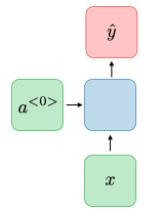

### One-to-many

![image.png](lstm_images/o2m.png)
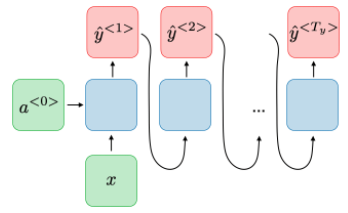

### Many-to-one

![image.png](lstm_images/m2o.png)
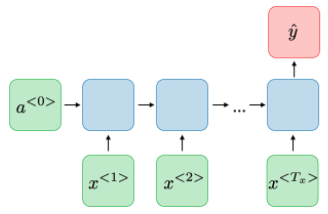

### Many-to-many #1

![image.png](lstm_images/m2m.png)
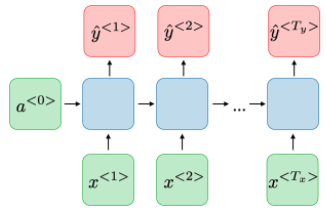

### Many-to-many #2

![image.png](lstm_images/m2m2.png)
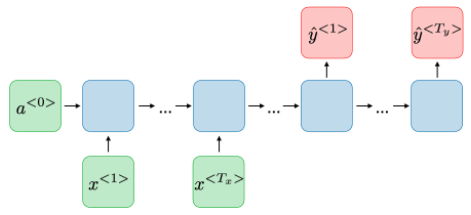

## Long short-term memory

### Rolled RNN

![image.png](lstm_images/rolled.png)
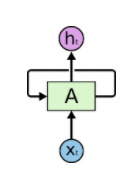

### Unrolled RNN

![image.png](lstm_images/unrolled.png)
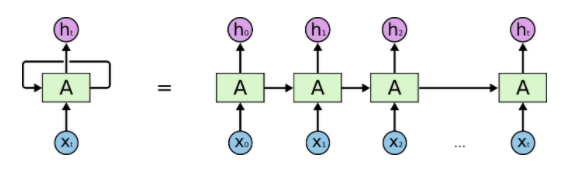

In [2]:
layers = [
    keras.layers.SimpleRNN(50, input_shape=(None, 10)),
    keras.layers.Dense(10, activation='softmax')
]
model = keras.models.Sequential(layers)
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                3050      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                510       
Total params: 3,560
Trainable params: 3,560
Non-trainable params: 0
_________________________________________________________________


$$
h(t) = \tanh{\big(x(t) \cdot W_x^h + h(t-1) \cdot W_h^h + b_h\big)} \\
\widehat y(t) = softmax\big(h(t) \cdot W_h^y\big)
$$

![image.png](lstm_images/rnn.png)
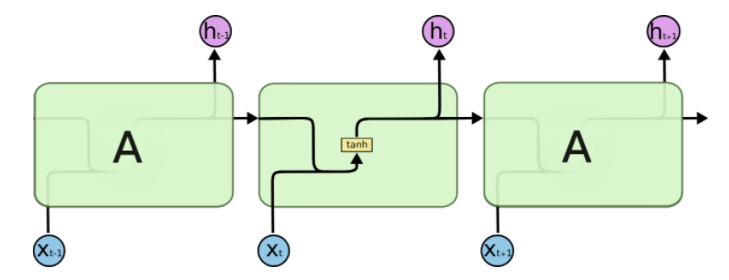

### LSTM

![image.png](lstm_images/lstm.png)
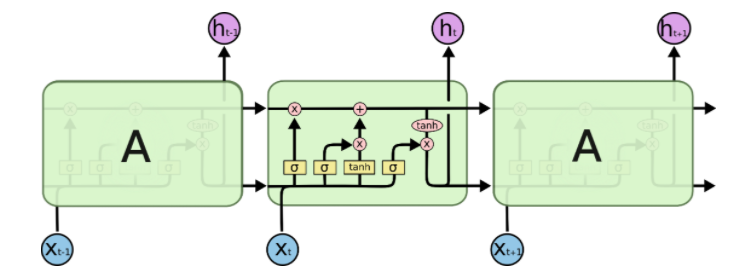

## Sentiment analysis with LSTM

In [3]:
# LSTM for sequence classification in the IMDB dataset
import numpy
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

# fix random seed for reproducibility
numpy.random.seed(7)

In [4]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
word_index = keras.datasets.imdb.get_word_index()

In [5]:
# truncate and pad input sequences
max_review_length = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_review_length)
X_test = sequence.pad_sequences(X_test, maxlen=max_review_length)

In [ ]:
# create the model
embedding_vecor_length = 32
model = Sequential()
model.add(Embedding(top_words, embedding_vecor_length, input_length=max_review_length))
model.add(???)
model.add(???)

model.compile(loss=???, optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [12]:
from keras.models import load_model
model = load_model('../data/sentiment_analysis.h5')

/home/boazshvarzman/miniconda3/envs/srann3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [8]:
model.fit(X_train, y_train, epochs=3, batch_size=64)

/home/boazshvarzman/miniconda3/envs/srann3/lib/python3.6/site-packages/tensorflow_core/python/framework/indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/3
25000/25000 [==============================] - 226s 9ms/step - loss: 0.5302 - accuracy: 0.7248
Epoch 2/3
25000/25000 [==============================] - 222s 9ms/step - loss: 0.3225 - accuracy: 0.8664
Epoch 3/3
25000/25000 [==============================] - 223s 9ms/step - loss: 0.2536 - accuracy: 0.8989


In [10]:
model.save('../data/sentiment_analysis.h5')

In [13]:
# Final evaluation of the model
scores = model.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (scores[1] * 100))

25000/25000 [==============================] - 93s 4ms/step
Accuracy: 83.24%


#### References

[Standord CS230, Recurrent Neural Networks Cheetsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-recurrent-neural-networks)  
[Understanding LSTM Networks; Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/)  
[Sequence Classification with LSTM Recurrent Neural Networks in Python with Keras; Jason Brownlee](https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/)